<a href="https://colab.research.google.com/github/ErisonBarros/Repositorio_BR101/blob/erison.barros/Analise_Espacial_IVS_10X_Dens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="ee-notebook-buttons" align="left">
    <td><a target="_blank"  href="https://github.com/giswqs/earthengine-py-notebooks/tree/master/Template/geemap_colab.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_blank"  href="https://nbviewer.jupyter.org/github/giswqs/earthengine-py-notebooks/blob/master/Template/geemap_colab.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_blank"  href="https://colab.research.google.com/github/giswqs/earthengine-py-notebooks/blob/master/Template/geemap_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

<a href="https://github.com/ErisonBarros/modelojupyternotebook/blob/erison.barros/C%C3%B3pia_de_Modelo_Notebook.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
%ls -a

./  ../  .config/  drive/  sample_data/


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks/Profile_BR-101

/content/drive/MyDrive/Colab Notebooks/Profile_BR-101


In [ ]:
!sudo apt-get update
!sudo apt-get install textlive-full

In [ ]:
pip install nbconvert

In [14]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [17]:
!wget -nc /content/drive/MyDrive/Colab Notebooks/Profile_BR-101/Analise Espacial_IVS_10X Dens.ipynb
rom colab_pdf import colab_pdf
colab_pdf('pandas-assignment.ipynb')

/content/drive/MyDrive/Colab: Scheme missing.
--2022-08-08 20:30:52--  http://notebooks/Profile_BR-101/Analise
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’
--2022-08-08 20:30:52--  http://espacial_ivs_10x/
Resolving espacial_ivs_10x (espacial_ivs_10x)... failed: Name or service not known.
wget: unable to resolve host address ‘espacial_ivs_10x’
--2022-08-08 20:30:52--  http://dens.ipynb/
Resolving dens.ipynb (dens.ipynb)... failed: Name or service not known.
wget: unable to resolve host address ‘dens.ipynb’


In [ ]:
# ! jupyter nbconvert --to pdf notebook.ipynb;

!jupyter nbconvert --to html /content/foo.ipynb

#! jupyter nbconvert Analise_Espacial_IVS_10X_Dens.ipynb --to pdf

# !jupyter nbconvert --to pdf

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab Notebooks/Profile_BR-101/Analise Espacial_IVS_10X Dens.ipynb

In [ ]:
! jupyter nbconvert --to hml /content/drive/MyDrive/Colab Notebooks/Profile_BR-101/Analise Espacial_IVS_10X Dens.ipynb

In [ ]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab Notebooks/Profile_BR-101/Analise Espacial_IVS_10X Dens.ipynb

In [ ]:
!pip install qrcode

In [ ]:
import qrcode
qr=qrcode.QRCode(
    version=5,
    box_size=5,
    border=4
)
dados="https://colab.research.google.com/github/ErisonBarros/Repositorio_BR101/blob/erison.barros/Analise_Espacial_IVS_10X_Dens.ipynb#scrollTo=eQjxxsY-zHHo"
img=qrcode.make(dados)


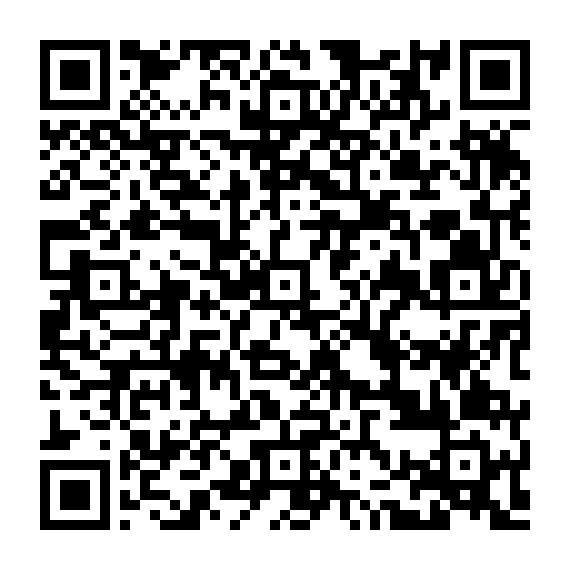

In [ ]:
img

# Nova seção

Imprenssão

In [ ]:
%pprint

Pretty printing has been turned ON




---



https://github.com/ErisonBarros/Repositorio_BR101.git



---


# Sumario

1. [Introdução]()
2. [Importação das Bibliotecas]()

      2.1. [Instalação do Biblioteca  PySAL]()

      2.2. [Instalação do Biblioteca Geopandas]()

      2.3. [Verificação da Versão]()


3. [Preparação dos Dados]()
4. [Converter de Geopandas para Pandas (dataframe)]()
5. [Ánalise Exploratória das Ocupações]()

    5.1 [Histograma dos Dados]()

    5.2 [Avaliação das Ocupações em Relação ao Classe de Cobertura e IVS de Renda]()

    5.3 [Unir os poligogons dos dados censitários e limite municipal com as Ocupações Irregulares]()

    5.4 [Analise Exploratória Espacial das Ocupações Irregulares de 2010]()

4. [Conclusão](#Conclusão)




---



# 1. Introdução
Vou focar aqui nas análises espaciais feitas, e vou pular alguns tratamentos, descrevendo-os sucintamente durante a explicação. Se quiser ver os detalhes da implementação, acesse o notebook desta análise que está no meu git 

[Repositorio_BR101](https://github.com/ErisonBarros/Repositorio_BR101)

Link:
```
https://github.com/ErisonBarros/Repositorio_BR101
```





# 2. Importação de Bibliotecas

## 2.1 Instalação do Biblioteca  PySAL

Em uma célula, instale o pacote PySAL com o comando:

In [ ]:
!python -m pip install pysal

## 2.2. Instalar o geopandas
Para ler o arquivo do tipo shape, utilizei um pacote chamado geopandas. Para instalá-lo, rode em uma célula:

In [ ]:
!python -m pip install geopandas

## 2.3. Verificação da Versão

Após a instalação, verifique a versão com o comando:

In [ ]:
!python -m pip list

## 3. Preparação dos Dados
a) Importar os pacotes da biblioteca espacial PySAL:

In [ ]:

## Bibliotecas para tratamento de dados
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

## Geopandas: Utilizamos para conseguir ler arquivos do tipo Shape (.shp)
import geopandas as gpd

## Pacotes PySAL
from libpysal.weights.contiguity import Queen
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster, plot_moran_bv

b) Carreguei o shapefile

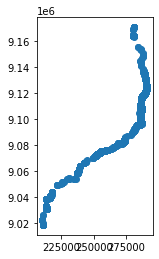

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/DATASET_BR101/Dataset_def.shp')
gdf.plot()

# Verificação das Variaveis

In [ ]:
gdf.head()

,POLY_ID,fid,REGIAO,MRT,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,...,NM_MUNICIP,CODMUN7,CODMUN6,CATEGORIES,SELECTED,PC1,PC2,PC3,CL,geometry
0,1.0,16.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.85225,-3.110903,0.53429,7.0,POINT (210786.725 9018398.128)
1,2.0,17.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.85225,-3.110903,0.53429,7.0,POINT (210793.415 9018391.317)
2,3.0,18.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.85225,-3.110903,0.53429,7.0,POINT (210797.185 9018388.763)
3,4.0,19.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.85225,-3.110903,0.53429,7.0,POINT (210801.564 9018386.573)
4,5.0,20.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.85225,-3.110903,0.53429,7.0,POINT (210793.901 9018390.830)


Verificação das Colunas Importadas

In [ ]:
gdf.columns

Index(['POLY_ID', 'fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N',
       'v22_10', 'v21_10', 'v8_10', 'v7_10', 'v5_10', 'v4_10', 'v3_10',
       'v1_10', 'mmpr_10', 'palfap_10', 'palfac_10', 'lixo_10', 'esg_10',
       'agua_10', 'join_Layer', 'distance', 'Densiadde_', 'NM_MUNICIP',
       'CODMUN7', 'CODMUN6', 'CATEGORIES', 'SELECTED', 'PC1', 'PC2', 'PC3',
       'CL', 'geometry'],
      dtype='object')

Verificação do Tipo de Dado

In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

# Converter de Geopandas  para Pandas (dataframe)

Verificando quais colunas serão trabalhadas

In [ ]:
df1 = pd.DataFrame(gdf)

In [ ]:
df1.columns

Index(['POLY_ID', 'fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N',
       'v22_10', 'v21_10', 'v8_10', 'v7_10', 'v5_10', 'v4_10', 'v3_10',
       'v1_10', 'mmpr_10', 'palfap_10', 'palfac_10', 'lixo_10', 'esg_10',
       'agua_10', 'join_Layer', 'distance', 'Densiadde_', 'NM_MUNICIP',
       'CODMUN7', 'CODMUN6', 'CATEGORIES', 'SELECTED', 'PC1', 'PC2', 'PC3',
       'CL', 'geometry'],
      dtype='object')

In [ ]:
df1=df1[['fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N'
       ]]

In [ ]:
df1.head()

,fid,REGIAO,MRT,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,area,...,IVS_REN10,IVS_00,IVS_INFR00,IVS_CAPH00,IVS_REN00,uso_18,uso_10,uso_00,E,N
0,16.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,111.0,...,0.637,0.732,0.518,0.896,0.782,3.0,3.0,3.0,210786.724863,9.018398e+06
1,17.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,111.0,...,0.637,0.732,0.518,0.896,0.782,3.0,3.0,3.0,210793.414701,9.018391e+06
2,18.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,111.0,...,0.637,0.732,0.518,0.896,0.782,3.0,3.0,3.0,210797.185338,9.018389e+06
3,19.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,111.0,...,0.637,0.732,0.518,0.896,0.782,3.0,3.0,3.0,210801.564141,9.018387e+06
4,20.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.17,4.923,14,111.0,...,0.637,0.732,0.518,0.896,0.782,3.0,3.0,3.0,210793.901235,9.018391e+06


# 5. Ánalise Exploratória das Ocupações

## 5.1  Histograma dos Dados

## Ocupações em Relação ao USO e cobertura em 2000

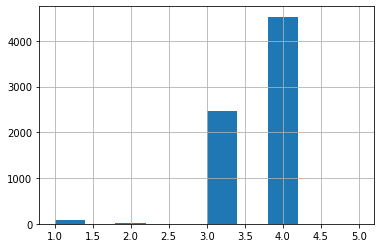

In [ ]:
df1.uso_00.hist()

## Ocupações em Relação ao USO e cobertura em 2010

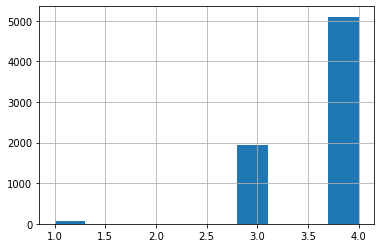

In [ ]:
df1.uso_10.hist()

## Ocupações em Relação ao USO e cobertura em 2018

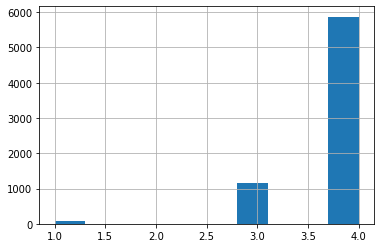

In [ ]:
df1.uso_18.hist()

##  Avaliação das Ocupações em Relação ao Classe de Cobertura e IVS de Renda

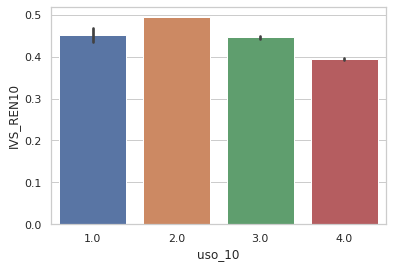

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="uso_10", y="IVS_REN10", data=df1)

# Visualização Espacial das Ocupações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

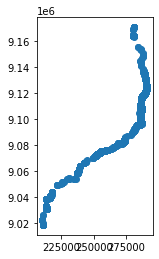

In [ ]:
from numpy.ma.core import size
ocup = gpd.read_file('/content/drive/MyDrive/DATASET_BR101/Dataset_def.shp')
ocup.plot()

In [ ]:
ocup.describe()

,POLY_ID,fid,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,area,dens,...,distance,Densiadde_,CODMUN7,CODMUN6,CATEGORIES,SELECTED,PC1,PC2,PC3,CL
count,7112.00000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,...,7112.000000,7112.000000,7.092000e+03,7092.000000,7112.0,7112.0,7.112000e+03,7.112000e+03,7.112000e+03,7112.000000
mean,3556.50000,3576.490157,14971.744961,7594.459843,22349.029066,863.013384,4.794870,867.945163,244.621161,1889.246066,...,72.103624,5259.786372,2.608792e+06,260878.678793,1.0,0.0,1.315794e-08,3.904222e-08,4.695374e-08,2.931243
std,2053.20189,2053.218917,2218.095832,505.190589,3931.004091,701.666450,5.994344,697.032958,93.111174,937.310492,...,124.976456,4455.648101,3.898722e+03,389.756580,0.0,0.0,1.971929e+00,1.146489e+00,9.835109e-01,1.723438
min,1.00000,16.000000,8363.260000,6089.320000,10637.190000,9.170000,0.000000,14.000000,73.900000,150.720000,...,0.779650,2.344050,2.600054e+06,260005.000000,1.0,0.0,-1.469567e+01,-5.599160e+00,-4.422359e+00,1.000000
25%,1778.75000,1798.750000,15716.130000,7764.000000,23668.260000,93.931000,0.000000,102.000000,217.800000,724.900000,...,33.132886,1690.851070,2.606804e+06,260680.000000,1.0,0.0,1.695634e-01,-3.195566e-01,-4.052095e-01,1.000000
50%,3556.50000,3576.500000,15716.130000,7764.000000,23668.260000,1537.704000,0.000000,1538.000000,217.800000,2493.060000,...,42.405936,3551.629640,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,3.000000
75%,5334.25000,5354.250000,15716.130000,7764.000000,23668.260000,1537.704000,8.090000,1538.000000,302.900000,2493.060000,...,54.201682,9637.294920,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,4.000000
max,7112.00000,7132.000000,15716.130000,7764.000000,23668.260000,1537.704000,20.918000,1538.000000,543.000000,2493.060000,...,1078.016655,14008.902340,2.616506e+06,261650.000000,1.0,0.0,3.918216e+00,9.683645e-01,2.089046e+00,7.000000


# Matriz de Vizinhaça


In [ ]:
weights_ocup = Queen.from_dataframe(ocup)
W_matrix, ids = weights_ocup.full()
list(W_matrix[0]) # vizinhança do estado PE (matriz de 0's e 1's)

In [ ]:
weights_gdf = Queen.from_dataframe(gdf)
W_matrix, ids = weights_gdf.full()
list(W_matrix[0]) # vizinhança do estado PE (matriz de 0's e 1's)

É uma prática comum utilizar os valores normalizados linha a linha dessa matriz de vizinhanças, de modo que as vizinhanças de um estado se tornam menos importantes se ele tiver muitos vizinhos.
Para isso, usamos a função transform:

In [ ]:
weights_ocup.transform = 'r'
W_matrix, ids = weights_ocup.full()
list(W_matrix[0]) # vizinhança Ocupação  (matriz normalizada)

In [ ]:
weights_gdf.transform = 'r'
W_matrix, ids = weights_gdf.full()
list(W_matrix[0]) # vizinhança Ocupação  (matriz normalizada)

Como se trata de uma matriz esparsa com n * n elementos, é interessante verificar se a quantidade de linhas (n) está certa, e qual é a proporção de nulos que temos:

In [ ]:
str(np.round(weights_gdf.pct_nonzero,2))+"%"

'0.08%'

In [ ]:
weights_ocup.n

7112

# 5.3 Unir os poligogons dos dados censitários e limite municipal com as Ocupações Irregulares

In [ ]:
gdf.describe()

,POLY_ID,fid,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,area,dens,...,distance,Densiadde_,CODMUN7,CODMUN6,CATEGORIES,SELECTED,PC1,PC2,PC3,CL
count,7112.00000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,...,7112.000000,7112.000000,7.092000e+03,7092.000000,7112.0,7112.0,7.112000e+03,7.112000e+03,7.112000e+03,7112.000000
mean,3556.50000,3576.490157,14971.744961,7594.459843,22349.029066,863.013384,4.794870,867.945163,244.621161,1889.246066,...,72.103624,5259.786372,2.608792e+06,260878.678793,1.0,0.0,1.315794e-08,3.904222e-08,4.695374e-08,2.931243
std,2053.20189,2053.218917,2218.095832,505.190589,3931.004091,701.666450,5.994344,697.032958,93.111174,937.310492,...,124.976456,4455.648101,3.898722e+03,389.756580,0.0,0.0,1.971929e+00,1.146489e+00,9.835109e-01,1.723438
min,1.00000,16.000000,8363.260000,6089.320000,10637.190000,9.170000,0.000000,14.000000,73.900000,150.720000,...,0.779650,2.344050,2.600054e+06,260005.000000,1.0,0.0,-1.469567e+01,-5.599160e+00,-4.422359e+00,1.000000
25%,1778.75000,1798.750000,15716.130000,7764.000000,23668.260000,93.931000,0.000000,102.000000,217.800000,724.900000,...,33.132886,1690.851070,2.606804e+06,260680.000000,1.0,0.0,1.695634e-01,-3.195566e-01,-4.052095e-01,1.000000
50%,3556.50000,3576.500000,15716.130000,7764.000000,23668.260000,1537.704000,0.000000,1538.000000,217.800000,2493.060000,...,42.405936,3551.629640,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,3.000000
75%,5334.25000,5354.250000,15716.130000,7764.000000,23668.260000,1537.704000,8.090000,1538.000000,302.900000,2493.060000,...,54.201682,9637.294920,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,4.000000
max,7112.00000,7132.000000,15716.130000,7764.000000,23668.260000,1537.704000,20.918000,1538.000000,543.000000,2493.060000,...,1078.016655,14008.902340,2.616506e+06,261650.000000,1.0,0.0,3.918216e+00,9.683645e-01,2.089046e+00,7.000000


 Identificação das Variaveis

In [ ]:
gdf.columns

Index(['POLY_ID', 'fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N',
       'v22_10', 'v21_10', 'v8_10', 'v7_10', 'v5_10', 'v4_10', 'v3_10',
       'v1_10', 'mmpr_10', 'palfap_10', 'palfac_10', 'lixo_10', 'esg_10',
       'agua_10', 'join_Layer', 'distance', 'Densiadde_', 'NM_MUNICIP',
       'CODMUN7', 'CODMUN6', 'CATEGORIES', 'SELECTED', 'PC1', 'PC2', 'PC3',
       'CL', 'geometry'],
      dtype='object')

Analise Exploratória dos Dados

In [ ]:
ocup.describe()

,POLY_ID,fid,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,area,dens,...,distance,Densiadde_,CODMUN7,CODMUN6,CATEGORIES,SELECTED,PC1,PC2,PC3,CL
count,7112.00000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,...,7112.000000,7112.000000,7.092000e+03,7092.000000,7112.0,7112.0,7.112000e+03,7.112000e+03,7.112000e+03,7112.000000
mean,3556.50000,3576.490157,14971.744961,7594.459843,22349.029066,863.013384,4.794870,867.945163,244.621161,1889.246066,...,72.103624,5259.786372,2.608792e+06,260878.678793,1.0,0.0,1.315794e-08,3.904222e-08,4.695374e-08,2.931243
std,2053.20189,2053.218917,2218.095832,505.190589,3931.004091,701.666450,5.994344,697.032958,93.111174,937.310492,...,124.976456,4455.648101,3.898722e+03,389.756580,0.0,0.0,1.971929e+00,1.146489e+00,9.835109e-01,1.723438
min,1.00000,16.000000,8363.260000,6089.320000,10637.190000,9.170000,0.000000,14.000000,73.900000,150.720000,...,0.779650,2.344050,2.600054e+06,260005.000000,1.0,0.0,-1.469567e+01,-5.599160e+00,-4.422359e+00,1.000000
25%,1778.75000,1798.750000,15716.130000,7764.000000,23668.260000,93.931000,0.000000,102.000000,217.800000,724.900000,...,33.132886,1690.851070,2.606804e+06,260680.000000,1.0,0.0,1.695634e-01,-3.195566e-01,-4.052095e-01,1.000000
50%,3556.50000,3576.500000,15716.130000,7764.000000,23668.260000,1537.704000,0.000000,1538.000000,217.800000,2493.060000,...,42.405936,3551.629640,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,3.000000
75%,5334.25000,5354.250000,15716.130000,7764.000000,23668.260000,1537.704000,8.090000,1538.000000,302.900000,2493.060000,...,54.201682,9637.294920,2.611606e+06,261160.000000,1.0,0.0,5.933316e-01,5.792282e-01,6.354804e-01,4.000000
max,7112.00000,7132.000000,15716.130000,7764.000000,23668.260000,1537.704000,20.918000,1538.000000,543.000000,2493.060000,...,1078.016655,14008.902340,2.616506e+06,261650.000000,1.0,0.0,3.918216e+00,9.683645e-01,2.089046e+00,7.000000


In [ ]:
ocup.columns

Index(['POLY_ID', 'fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N',
       'v22_10', 'v21_10', 'v8_10', 'v7_10', 'v5_10', 'v4_10', 'v3_10',
       'v1_10', 'mmpr_10', 'palfap_10', 'palfac_10', 'lixo_10', 'esg_10',
       'agua_10', 'join_Layer', 'distance', 'Densiadde_', 'NM_MUNICIP',
       'CODMUN7', 'CODMUN6', 'CATEGORIES', 'SELECTED', 'PC1', 'PC2', 'PC3',
       'CL', 'geometry'],
      dtype='object')

União de Tabelas

In [ ]:
df_final = pd.merge(ocup, gdf, how = 'left')

In [ ]:
df_final

,POLY_ID,fid,REGIAO,MRT,VTN_med,VTN_minim,VTN_max,pop_urbana,pop_rural,pop_total,...,NM_MUNICIP,CODMUN7,CODMUN6,CATEGORIES,SELECTED,PC1,PC2,PC3,CL,geometry
0,1.0,16.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.170,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.852250,-3.110903,0.534290,7.0,POINT (210786.725 9018398.128)
1,2.0,17.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.170,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.852250,-3.110903,0.534290,7.0,POINT (210793.415 9018391.317)
2,3.0,18.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.170,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.852250,-3.110903,0.534290,7.0,POINT (210797.185 9018388.763)
3,4.0,19.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.170,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.852250,-3.110903,0.534290,7.0,POINT (210801.564 9018386.573)
4,5.0,20.0,MATA SUL,MRT III,8363.26,6089.32,10637.19,9.170,4.923,14,...,XEXÉU,2616506.0,261650.0,1.0,0.0,0.852250,-3.110903,0.534290,7.0,POINT (210793.901 9018390.830)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,7108.0,7128.0,METROPOLITANA,MRT I,15716.13,7764.00,23668.26,1537.704,0.000,1538,...,None,NaN,NaN,1.0,0.0,0.717293,-0.664901,-0.405209,3.0,POINT (285216.827 9103543.671)
7108,7109.0,7129.0,METROPOLITANA,MRT I,15716.13,7764.00,23668.26,1537.704,0.000,1538,...,None,NaN,NaN,1.0,0.0,0.717293,-0.664901,-0.405209,3.0,POINT (285209.019 9103541.617)
7109,7110.0,7130.0,METROPOLITANA,MRT I,15716.13,7764.00,23668.26,1537.704,0.000,1538,...,None,NaN,NaN,1.0,0.0,0.717293,-0.664901,-0.405209,3.0,POINT (285202.957 9103540.281)
7110,7111.0,7131.0,METROPOLITANA,MRT I,15716.13,7764.00,23668.26,1537.704,0.000,1538,...,None,NaN,NaN,1.0,0.0,0.717293,-0.664901,-0.405209,3.0,POINT (285194.943 9103538.329)


In [ ]:
df_final.columns

Index(['POLY_ID', 'fid', 'REGIAO', 'MRT', 'VTN_med', 'VTN_minim', 'VTN_max',
       'pop_urbana', 'pop_rural', 'pop_total', 'area', 'dens', 'tax_Urban',
       'IVS_10', 'IVS_INF10', 'IVS_CAP10', 'IVS_REN10', 'IVS_00', 'IVS_INFR00',
       'IVS_CAPH00', 'IVS_REN00', 'uso_18', 'uso_10', 'uso_00', 'E', 'N',
       'v22_10', 'v21_10', 'v8_10', 'v7_10', 'v5_10', 'v4_10', 'v3_10',
       'v1_10', 'mmpr_10', 'palfap_10', 'palfac_10', 'lixo_10', 'esg_10',
       'agua_10', 'join_Layer', 'distance', 'Densiadde_', 'NM_MUNICIP',
       'CODMUN7', 'CODMUN6', 'CATEGORIES', 'SELECTED', 'PC1', 'PC2', 'PC3',
       'CL', 'geometry'],
      dtype='object')

# 5.4 Analise Exploratória Espacial das Ocupações Irregulares de 2010

**Cálculo do Moran’s I univariado**

In [ ]:
help(Moran)

In [ ]:
y=df_final["IVS_10"].copy()
moran = Moran(y, weights_ocup)

In [ ]:
moran.I

0.9927140331806373

O valor de autocorrelação é positivo.

The Spatial Autocorrelation (Global Moran's I) tool is an inferential statistic, which means that the results of the analysis are always interpreted within the context of its null hypothesis.


O valor do Moran's I é uma estatística que deve ser avaliada no contexto de um teste de hipótese sobre a aleatoriedade da distribuição dos valores de y no espaço.

Na prática, o valor do índice calculado com moran.I é um valor normalizado: calcula-se sua esperança teórica, calcula-se seu desvio-padrão teórico, e o Moran's I é o z-score ( **equação** ). É a partir dessa estatística que aceitamos ou rejeitamos a hipótese inicial (H0) de os dados de y estarem distribuídos no espaço de forma aleatória. [5]

A significância do valor de Moran's I pode ser calculado de duas formas 

- Observando quanto o valor obtido para I é maior/menor do que o valor esperado (esperança) para o índice (EI), assumindo que y siga uma distribuição normal
- Observando permutações aleatórias dos valores de y no espaço e verificando a distribuição dos valores de I que obtemos. No caso, é definido um valor de permutações para esse cálculo, que por padrão é permutations=999


Como temos n = 27 < 40, a hipótese de normalidade pode não ser verdadeira, uma vez que a distribuição se aproxima de uma normal conforme n cresce. Logo, vamos avaliar a significância de I a partir de permutações dos dados no espaço.

In [ ]:
print("Significância em relação à distribuição dos índices I, após permutações aleatórias de y no espaço:")
print(f"Qtde. de permutações = {moran.permutations}")
print(f"Esperança de I       = {moran.EI_sim}")
print(f"P-valor de I         = {moran.p_sim}")

Significância em relação à distribuição dos índices I, após permutações aleatórias de y no espaço:
Qtde. de permutações = 999
Esperança de I       = -8.014349957589776e-05
P-valor de I         = 0.001


Percebemos que o índice obtido é bem maior que a média esperada, e é significativo em relação a um grau de significância de 5% (p-valor = 0.001 < 5%)

Concluímos que o valor de Moran's I = 0.9927140331806373 é estatisticamente significativo, e existe autocorrelação espacial positiva na variável ivs_10.

## Visualização do Moran's I

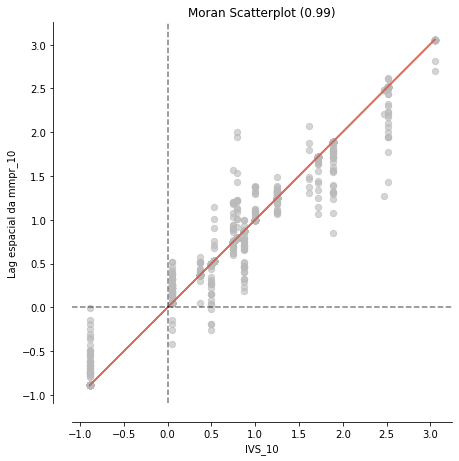

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
ax.set_xlabel('IVS_10')
ax.set_ylabel('Lag espacial da mmpr_10')
plt.show()

O valor do Moran's I é o coeficiente da reta de regressão entre a mmpr_10 e lag(mmpr_10).

#### Autocorrelação espacial local

Aqui, é feita a decomposição do Moran’s I de forma a construir uma medida localizada de autocorrelação. A ideia é encontrar hot spots e cold spots, que são regiões em que se encontram respectivamente pontos com maior e menor correlação espacial.

In [ ]:
moran_loc = Moran_Local(y, weights_ocup)

Fazemos um scatterplot que divide as áreas em 4 grupos:

High-high: 1º quadrante (em vermelho no gráfico)
Low-high: 2º quadrante
Low-low: 3º quadrante (em amarelo no gráfico)
High-low: 4º quadrante
O parâmetro p é o p-valor que caracteriza o limite de significância no Moran's Local:

Os pontos são coloridos de vermelho se forem considerados hot spots
Os pontos são coloridos de azul escuro se forem considerados cold spots
Os pontos ainda podem ser coloridos de amarelo ou de azul claro, se forem respectivamente High-Low ou Low-High. Os pontos em cinza não se caracterizam nem como hot spots nem como cold spots.

Manteremos nosso p igual a 5%.

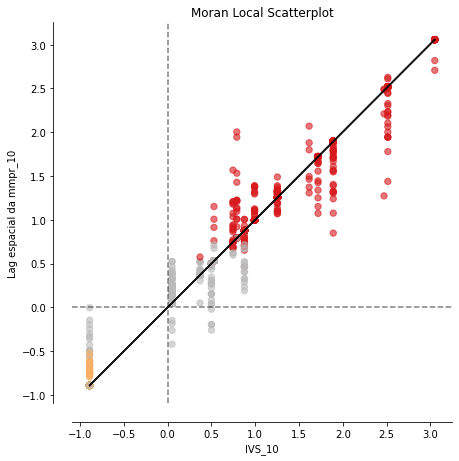

In [ ]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('IVS_10')
ax.set_ylabel('Lag espacial da mmpr_10')
plt.show()

## Visualizamos os clusters em um mapa

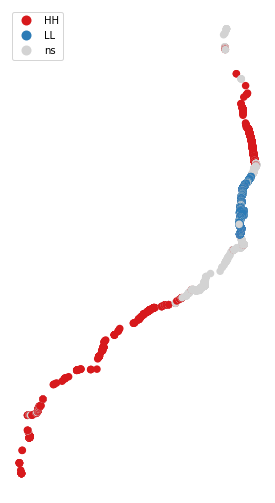

In [ ]:
lisa_cluster(moran_loc, df_final, p=0.05, figsize=(9,9))
plt.show()

Visão combinada

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


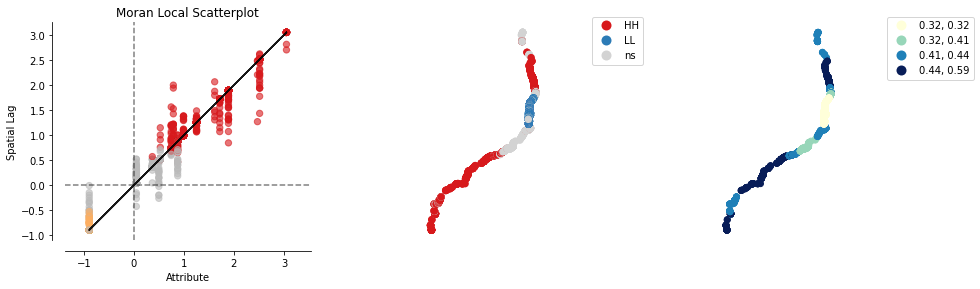

In [ ]:
plot_local_autocorrelation(moran_loc, df_final, 'IVS_10')
plt.show()

Observamos que os pontos centrais a centros urbanos têm uma tendência a ter regiões de alta IVS_10 vizinhas de regiões de IVS_10, ao passo que boa parte dos pontos em azul e sudeste do país têm uma tendência a terem regiões de baixa  IVS_10 vizinhas de regiões de baixa  IVS_10.

Percebemos que existe uma forte tendência central (LL = menor  IVS_10) em direção afastada dos centros urbanos (HH = Alta IVS_10).


## Bivariate Moran's I

Aqui, vamos avaliar o grau de correlação espacial de duas variáveis.

Vamos tomar a variável mmpr_10 e Densidade e calcular o grau de correlação espacial dessas duas variáveis.



In [ ]:
x = df_final['IVS_10'].values
y = df_final['dens'].values # variável que utilizaremos como lag

In [ ]:
moran_bv = Moran_BV(x, y, weights_ocup)

É importante notar que Moran_BV(x, y, weights) != Moran_BV(y, x, weights), pois estamos calculando o lag com variáveis diferentes.

In [ ]:
moran_bv.I

-0.6143076289786548


O valor de autocorrelação é negativa.


## Cálculo da significância

Faremos da mesma forma que o cálculo do Moran's I univariado. Vamos utilizar permutações para rejeitar a hipótese nula (H0) de aleatoriadade espacial dos y com significância (p-valor) de 5%.

In [ ]:
print("Significância em relação à distribuição dos índices I, após permutações aleatórias de y no espaço:")
print(f"Qtde. de permutações = 999")
print(f"Esperança de I       = {moran_bv.EI_sim}")
print(f"P-valor de I         = {moran_bv.p_sim}")

Significância em relação à distribuição dos índices I, após permutações aleatórias de y no espaço:
Qtde. de permutações = 999
Esperança de I       = 0.000672540743881838
P-valor de I         = 0.001


Percebemos que o índice obtido é bem maior que a média esperada, e é significativo em relação a um grau de significância de 5% (p-valor = 0.001 < 5%).

Ou seja, existe uma correlação espacial negativa entre:

*   IVS_10
*   Densidade


## Visualização do Moran's I

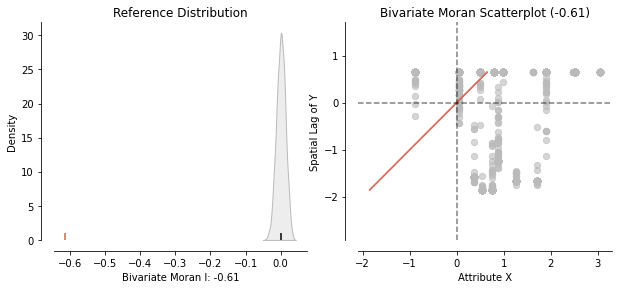

In [ ]:
plot_moran_bv(moran_bv)
plt.show()

Aqui podemos observar a distribuição normal de referência para o Moran's index, e a linha vermelha à direita mostra o valor de moran_bv.I obtido. O valor da área sob a curva, para bv_**index > -0,61 **é menor que o p-valor, de modo que rejeitamos a hipótese nula (H0) de distribuição aleatória de y.

### Moran's I Bivariado Local

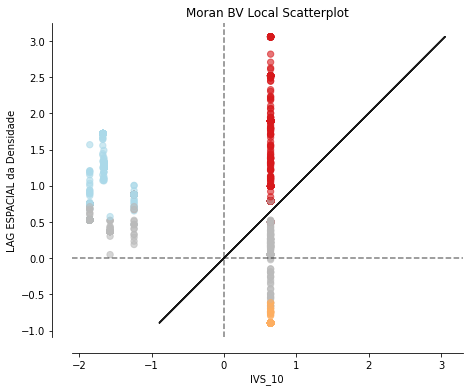

In [ ]:
moran_loc_bv = Moran_Local_BV(y, x, weights_ocup)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel('IVS_10')
ax.set_ylabel('LAG ESPACIAL da Densidade')
plt.show()

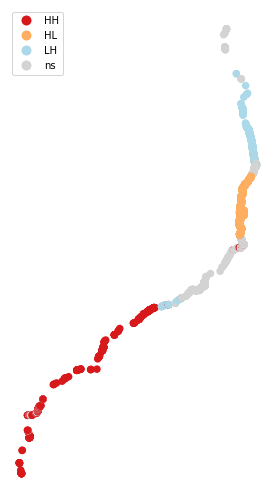

In [ ]:
lisa_cluster(moran_loc_bv, df_final, p=0.05, figsize=(9,9))
plt.show()

# 6. Conclusão

Observamos que principalmente os pontos afastados dos centros urbanos apresentam uma tendência a ter regiões de Baixa densidade poulacional, ao passo que os centrais ao centros urbanos têm uma tendência a terem regiões de alta IVS_10 vizinhas de regiões de alta densidade populacional.

Esse é um resultado curioso, uma vez que no Municipio de Recife apresenta-se principalmente com região com alta densidade de ocupações, mas ao mesmo tempo existe trecho com a densidade pequena de ocupações. Entretanto, estamos observando somente para ano 2010.